In [197]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import sklearn as sk
import pandas as pd
df = pd.read_csv('richmondlevels.csv')
print(df)

        DATE  GAUGE M NGVD29   GAUGE M   ACTION    FLOOD  MODERATE    MAJOR  \
0    3/19/36        7.138416  8.235696  3.84048  4.75488   5.66928  7.80288   
1    8/20/39        4.379976  5.477256  3.84048  4.75488   5.66928  7.80288   
2   10/17/42        6.035040  7.132320  3.84048  4.75488   5.66928  7.80288   
3    9/12/50        4.450080  5.547360  3.84048  4.75488   5.66928  7.80288   
4     6/4/59        3.672840  4.770120  3.84048  4.75488   5.66928  7.80288   
..       ...             ...       ...      ...      ...       ...      ...   
80   2/25/16        4.084320  5.181600  3.84048  4.75488   5.66928  7.80288   
81   5/27/17        4.349496  5.446776  3.84048  4.75488   5.66928  7.80288   
82   2/12/18        4.693920  5.791200  3.84048  4.75488   5.66928  7.80288   
83   2/25/19        4.943856  6.041136  3.84048  4.75488   5.66928  7.80288   
84   4/14/20        4.450080  5.547360  3.84048  4.75488   5.66928  7.80288   

       CLASS               TYPE     STORM     COAST

MODERATE    45
FLOOD       23
ACTION      12
MAJOR        5
Name: CLASS, dtype: int64


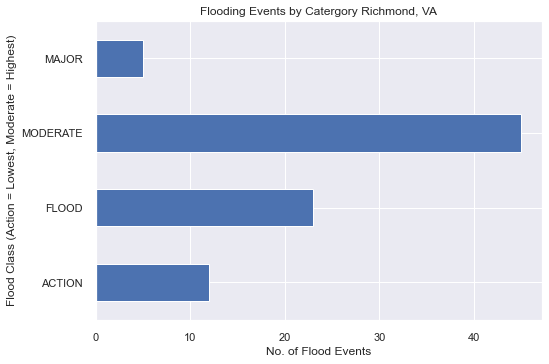

In [198]:
gauge = df['GAUGE M']
#separate the events by flood type
action_stage = df['ACTION']
flood_stage = df['FLOOD']
moderate_flood = df['MODERATE']
major = df['MAJOR']
date = df['DATE']
floodclass = df['CLASS']
floods = floodclass.value_counts().loc[['ACTION','FLOOD','MODERATE','MAJOR']].plot.barh()
plt.style.use('seaborn')
plt.xlabel("No. of Flood Events")
plt.ylabel("Flood Class (Action = Lowest, Moderate = Highest)")
plt.title("Flooding Events by Catergory Richmond, VA")
print(floodclass.value_counts())

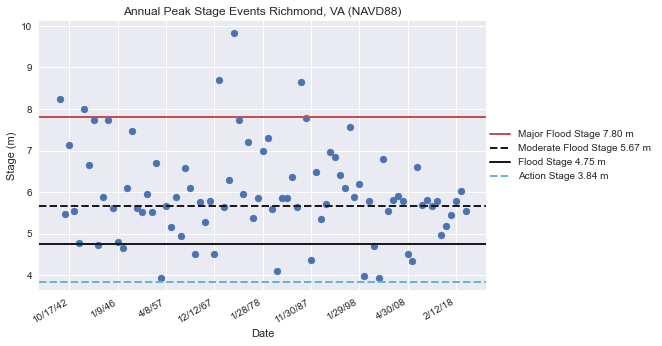

In [199]:
plt.style.use('seaborn')
#PLOTTING THE GAUGE, AND THEN THE FLOW ONE BY ONE
plt.scatter(date,gauge)
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Stage (m)")
plt.title('Annual Peak Stage Events Richmond, VA (NAVD88)')
plt.axhline(y=3.84, color='c', linestyle='--',label='Action Stage 3.84 m',lw=2)
plt.axhline(y=4.75, color='k', linestyle='-',label='Flood Stage 4.75 m',lw=2)
plt.axhline(y=5.67, color='k', linestyle='--',label='Moderate Flood Stage 5.67 m',lw=2)
plt.axhline(y=7.80, color='r', linestyle='-',label='Major Flood Stage 7.80 m',lw=2)
handles, labels = plt.gca().get_legend_handles_labels()
order = [3,2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],bbox_to_anchor=(1.0,0.5), loc="center left", borderaxespad=0)
#plt.legend(bbox_to_anchor=(1.0,0.5), loc="center left", borderaxespad=0)

Text(0.5, 1.0, 'Events with "ACTION" designation (NAVD88)')

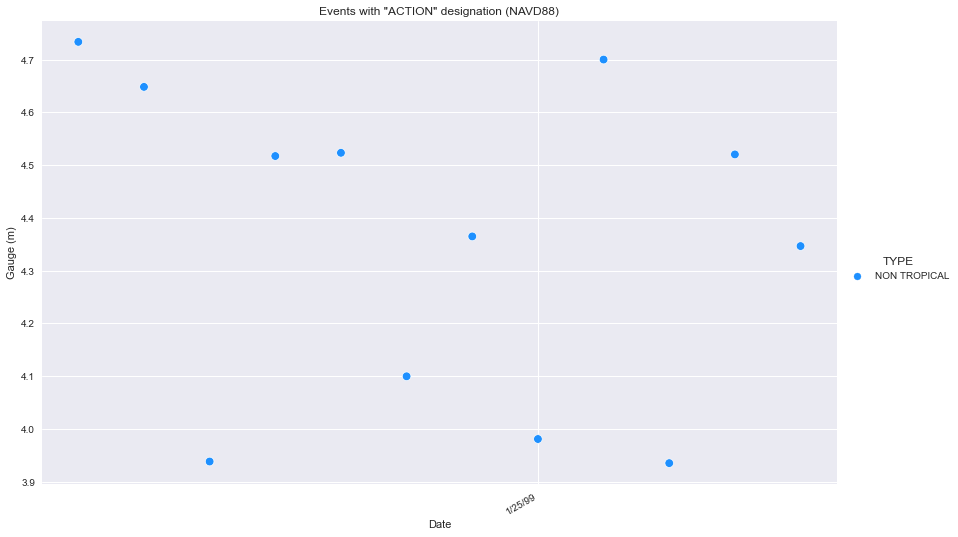

In [200]:
import matplotlib.dates as mdates
#Turn this into a scatter plot - only individual data points
floods=df[df['CLASS'] == 'ACTION']
del floods["FLOOD"]
del floods["MODERATE"]
del floods["MAJOR"]
plt.style.use('seaborn')
#PLOTTING THE GAUGE, AND THEN THE FLOW ONE BY ONE
gauge = floods['GAUGE M']
dates = floods['DATE']
color_dict = dict({'TROPICAL GULF':'cyan',
                  'NON TROPICAL':'dodgerblue',
                  'TROPICAL ATLANTIC':'red',
                  'HYBRID GULF': 'green',
                   'HYBRID ATLANTIC': 'orange'})
sns.relplot(x='DATE', y='GAUGE M', hue = "TYPE", data=floods,palette=color_dict,height=8.27, aspect=11.7/8.27,s=75, legend='full')
#plt.scatter(dates,gauge, color = 'blue')
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Gauge (m)")
plt.title('Events with "ACTION" designation (NAVD88)')
#print(floods)

Text(0.5, 1.0, 'Events with "FLOOD" designation,(NAVD88)')

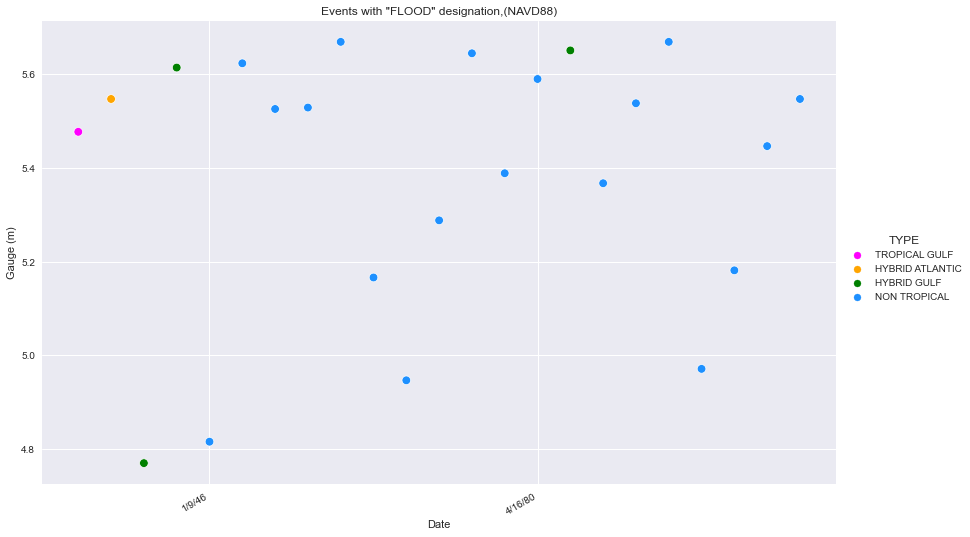

In [214]:
import matplotlib.dates as mdates
#Turn this into a scatter plot - only individual data points
floods=df[df['CLASS'] == 'FLOOD']
del floods["ACTION"]
del floods["MODERATE"]
del floods["MAJOR"]
plt.style.use('seaborn')
#PLOTTING THE GAUGE, AND THEN THE FLOW ONE BY ONE
gauge = floods['GAUGE M']
#flow = floods['FLOW CMS']
dates = floods['DATE']
color_dict = dict({'TROPICAL GULF':'magenta',
                  'NON TROPICAL':'dodgerblue',
                  'TROPICAL ATLANTIC':'red',
                  'HYBRID GULF': 'green',
                   'HYBRID ATLANTIC': 'orange'})
sns.relplot(x='DATE', y='GAUGE M', hue = "TYPE", data=floods,palette=color_dict,height=8.27, aspect=11.7/8.27,s=75, legend='full')
#plt.scatter(dates,gauge, color = 'red')
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Gauge (m)")
plt.title('Events with "FLOOD" designation,(NAVD88)')
#print(floods)

Text(0.5, 1.0, 'Events with "Moderate" designation,(NAVD88)')

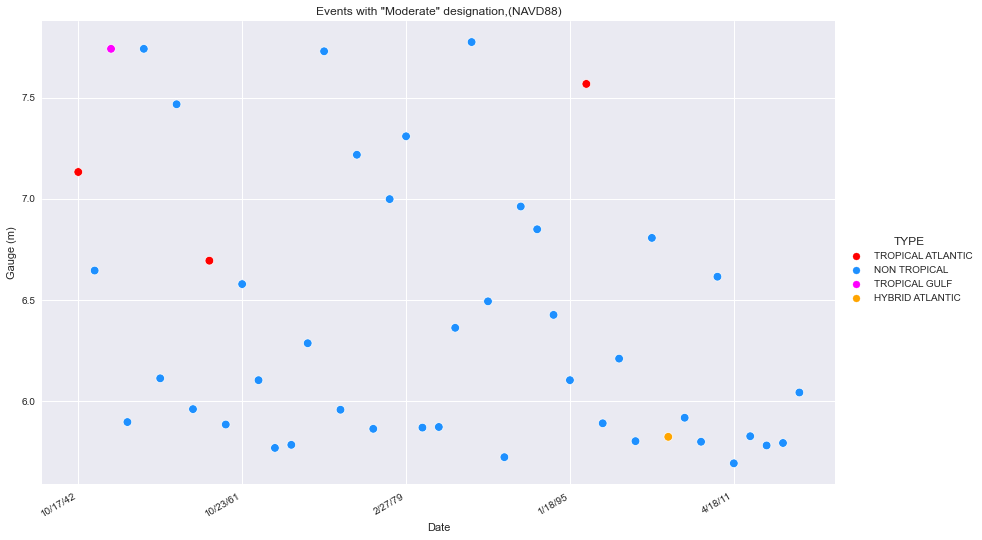

In [212]:
import matplotlib.dates as mdates
#Turn this into a scatter plot - only individual data points
floods=df[df['CLASS'] == 'MODERATE']
del floods["ACTION"]
del floods["FLOOD"]
del floods["MAJOR"]
plt.style.use('seaborn')
#PLOTTING THE GAUGE, AND THEN THE FLOW ONE BY ONE
gauge = floods['GAUGE M']
#flow = floods['FLOW CMS']
dates = floods['DATE']
color_dict = dict({'TROPICAL GULF':'magenta',
                  'NON TROPICAL':'dodgerblue',
                  'TROPICAL ATLANTIC':'red',
                  'HYBRID GULF': 'green',
                   'HYBRID ATLANTIC': 'orange'})
sns.relplot(x='DATE', y='GAUGE M', hue = "TYPE", data=floods,palette=color_dict,height=8.27, aspect=11.7/8.27,s=75, legend='full')
#plt.scatter(dates,gauge, color = 'red')
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Gauge (m)")
plt.title('Events with "Moderate" designation,(NAVD88)')
#print(floods)

Text(0.5, 1.0, 'Events with "MAJOR" designation, (NAVD88)')

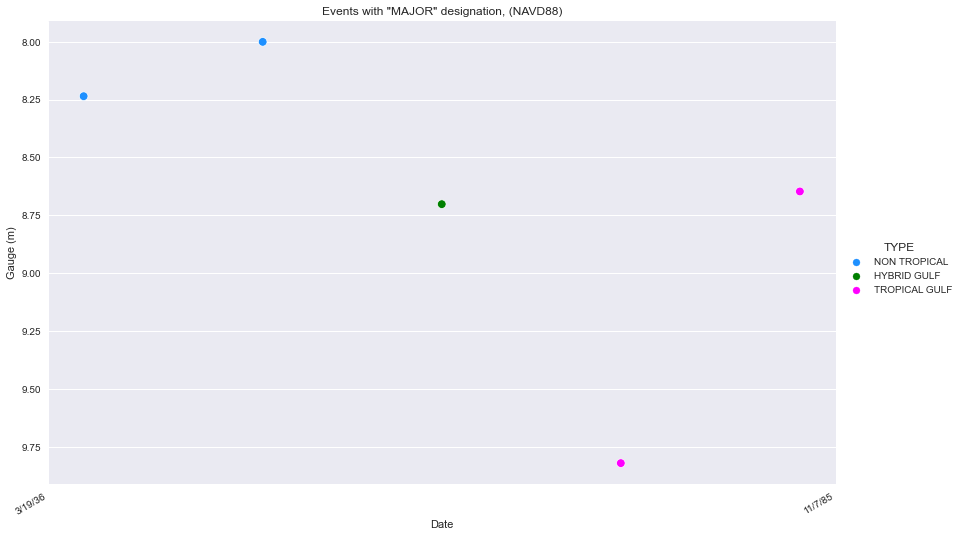

In [211]:
import matplotlib.dates as mdates
#Turn this into a scatter plot - only individual data points
floods=df[df['CLASS'] == 'MAJOR']
del floods["ACTION"]
del floods["FLOOD"]
del floods["MODERATE"]
floods["MAJOR"]
plt.style.use('seaborn')
#PLOTTING THE GAUGE, AND THEN THE FLOW ONE BY ONE
gauge = floods['GAUGE M']
dates = floods['DATE']

color_dict = dict({'TROPICAL GULF':'magenta',
                  'NON TROPICAL':'dodgerblue',
                  'TROPICAL ATLANTIC':'red',
                  'HYBRID GULF': 'green',
                   'HYBRID ATLANTIC': 'orange'})
sns.relplot(x='DATE', y='GAUGE M', hue = "TYPE", data=floods,palette=color_dict,height=8.27, aspect=11.7/8.27,s=75, legend='full')
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gca().invert_yaxis()
plt.title('Type of Flood Event Richmond, VA')
#plt.scatter(dates,gauge, color = 'blue')
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Gauge (m)")
plt.title('Events with "MAJOR" designation, (NAVD88)')

Text(0.5, 1.0, 'Type of Flood Event Richmond VA')

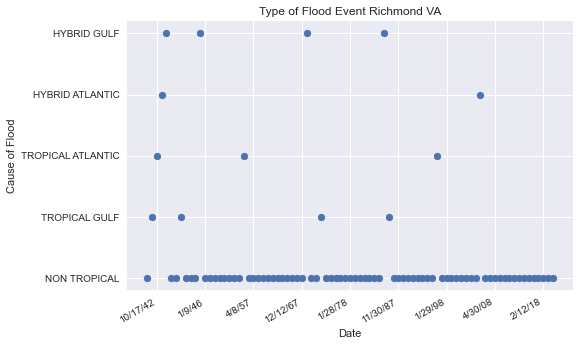

In [203]:
floodclass =df["CLASS"]
date = df['DATE']
contributor = df['TYPE'].astype(str)
plt.style.use('seaborn')
plt.scatter(date,contributor)
#plt.yticks(['ACTION','FLOOD','MODERATE','MAJOR'])
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval = 10))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
plt.ylabel("Cause of Flood")
plt.title('Type of Flood Event Richmond VA')


Text(0.5, 1.0, 'Type of Flood Event Richmond, VA')

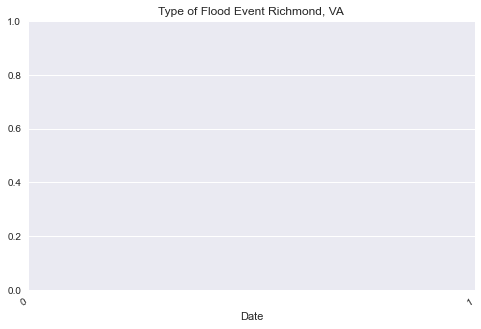

In [204]:
import seaborn as sns
floodclass =df["CLASS"]
date = df['DATE']
contributor = df['TYPE']
plt.style.use('seaborn')
#sns.catplot(x= date, y=floodclass, hue = contributor, data=df)
#plt.scatter(date,floodclass)

y_ticks_labels = ['NONE','ACTION','FLOOD','MODERATE','MAJOR']
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gcf().autofmt_xdate()
plt.xlabel("Date")
#plt.ylabel("Type of Flood"
plt.title('Type of Flood Event Richmond, VA')

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")


In [206]:
data = pd.read_csv('richmondlevels.csv')
print(df["CLASS"])

0        MAJOR
1        FLOOD
2     MODERATE
3        FLOOD
4        FLOOD
        ...   
80       FLOOD
81       FLOOD
82    MODERATE
83    MODERATE
84       FLOOD
Name: CLASS, Length: 85, dtype: object


Text(0.5, 1.0, 'Type of Flood Event Richmond, VA')

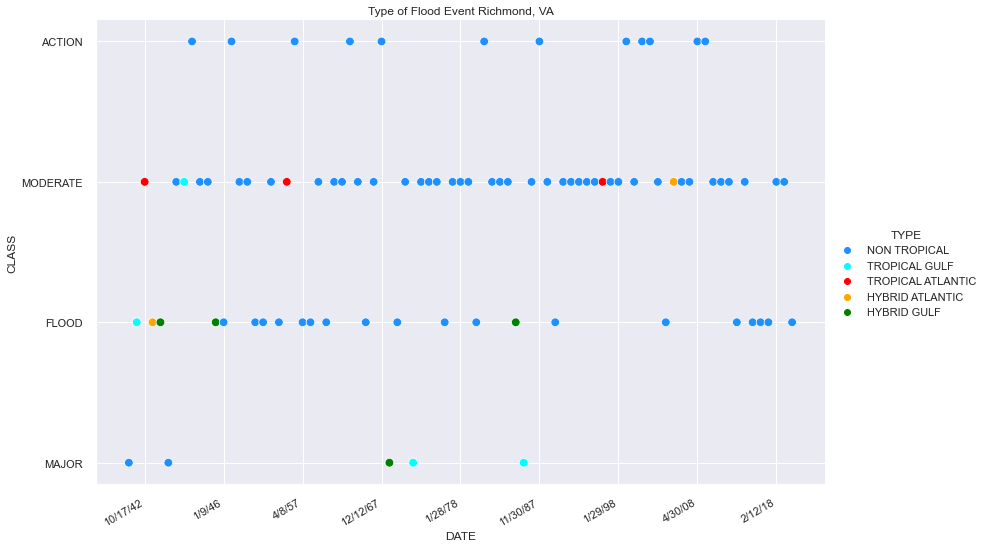

In [207]:
color_dict = dict({'TROPICAL GULF':'cyan',
                  'NON TROPICAL':'dodgerblue',
                  'TROPICAL ATLANTIC':'red',
                  'HYBRID GULF': 'green',
                   'HYBRID ATLANTIC': 'orange'})
sns.relplot(x="DATE", y='CLASS', hue = "TYPE", data=data,palette=color_dict,height=8.27, aspect=11.7/8.27,s=75, legend='full')
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))
plt.gca().invert_yaxis()
plt.title('Type of Flood Event Richmond, VA')
